<div>
<img src="https://nci.org.au/sites/default/files/logos/Logo-NCI.svg" width="300" align="left"/>
</div>

## Requesting National Geophysical Compilations data subsets through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Coverage Service (WCS), which is a standard protocol for serving geospatial data in common formats such as NetCDF and GeoTIFF.  

**Constructing WCS Requests**

GSKY's Web Coverage Service (WCS) allows users to request data or subsets of data in either NetCDF3 or GeoTIFF format. The request is made by constructing a **GetCoverage** URL, which is then used within a web browser to communicate to the GSKY Data Server. 

**For example, the GetCoverage request for the aster layer takes the following form:**

`http://gsky.nci.org.au/ows/national_geophysical_compilations`?
<br>
`service =` WCS
<br>
`&version =` 1.0.0
<br>
`&request =` GetCoverage
<br>
`&coverage =` value 
<br>
`&format =` value
<br>
`&bbox =`value
<br>
`&time =`value
<br>
`&crs =`value
<br>

**GetCoverage parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WCS                                                          |
|version      |     Required        |  `1.0.0`                                                          |
|request      |     Required        | `GetCoverage`                                                     |
|coverage     |     Required        | `<variable>`                                                      |
|format       |     Required        | `GeoTIFF  `, `GeoTIFF_Float  `, `NetCDF3  `                       |
|bbox`*`         |     Required/Optional        | `<xmin,ymin,xmax,ymax>`                                           |
|time`*`         |     Required/Optional        | `<time_value>`                                                    |
|srs, or crs  |     Optional        | `<srs_value>` or `<crs_value>`                                    |

`*`For large files and/or files with a time dimension, these might be necessary. If `bbox` is not defined the entire spatial domain will be returned (if server limits allow) and if `time` is not specified, either the first or sometimes last timestep is returned. 

**WCS GetCapabilities and DescribeCoverage**

In order to contruct the **GetCoverage** URL, a **GetCapabilities** request can be made to the server. This requests returns a xml describing the available WCS parameters (metadata, services, and data) made available by NCI's GSKY server. Additional metadata information can also be requested about a specific coverage layer by making a **DescribeCoverage** request. 

**GetCapabilities example:**

> [http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WCS&version=1.0.0&request=GetCapabilities<br/>](http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WCS&version=1.0.0&request=GetCapabilities)



**DescribeCoverage example:**
> [http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WCS&version=1.0.0&coverage=magmap2019_grid_tmi_awags_mag_2019&request=DescribeCoverage<br/>](http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WCS&version=1.0.0&coverage=magmap2019_grid_tmi_awags_mag_2019&request=DescribeCoverage)


<br>
<br>
<br>

**GetCoverage Request**
Using the information returned from the GetCapabilities and DescribeCoverage requests, a GetMap URL can be constructed and then entered into the address bar of any web browser.  

**Example GetCoverage (NetCDF format):**

> [http://gsky.nci.org.au/ows/national_geophysical_compilations?<br/>
service=WCS&<br/>
coverage=magmap2019_grid_tmi_awags_mag_2019&<br/>
service=WCS&<br/>
crs=EPSG:4326&<br/>
format=NetCDF&<br/>
request=GetCoverage&<br/>
height=256&<br/>
width=256&<br/>
version=1.0.0&<br/>
bbox=140.7,-27.9,153.8,-37&<br/>
time=2019-08-29T00:00:00.000Z<br/>
](http://gsky.nci.org.au/ows/national_geophysical_compilations?SERVICE=WCS&service=WCS&crs=EPSG:4326&format=NetCDF&request=GetCoverage&height=256&width=256&version=1.0.0&bbox=140.7,-27.9,153.8,-37&coverage=magmap2019_grid_tmi_awags_mag_2019&time=2019-08-29T00:00:00.000Z)


**Example GetCoverage (GeoTIFF format):**

> [http://gsky.nci.org.au/ows/national_geophysical_compilations?<br/>
service=WCS&<br/>
coverage=magmap2019_grid_tmi_awags_mag_2019&<br/>
service=WCS&<br/>
crs=EPSG:4326&<br/>
format=GeoTIFF&<br/>
request=GetCoverage&<br/>
height=256&<br/>
width=256&<br/>
version=1.0.0&<br/>
bbox=140.7,-27.9,153.8,-37&<br/>
time=2019-08-29T00:00:00.000Z<br/>
](http://gsky.nci.org.au/ows/national_geophysical_compilations?SERVICE=WCS&service=WCS&crs=EPSG:4326&format=GeoTIFF&request=GetCoverage&height=256&width=256&version=1.0.0&bbox=140.7,-27.9,153.8,-37.6&coverage=magmap2019_grid_tmi_awags_mag_2019&time=2019-08-29T00:00:00.000Z)

<br></br>

### Using GSKY's WCS in Python
Many tools are available to perform the above steps less manually. In particular, Python's OWSLib library can be used with GSKY's WCS. 

**The following libraries will need to be imported for the below example**

In [1]:
from owslib.wcs import WebCoverageService
from PIL import Image
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WCS&version=1.0.0&request=GetCapabilities'

**Now using OWSLib, you can begin by inspecting the service metadata:**

In [3]:
wcs = WebCoverageService(gsky_url)

**Find out the available data layers that can be requested:**

In [4]:
for layer in list(wcs.contents):
    print("Layer Name:", layer)
    print("Title:", wcs[layer].title, '\n')

Layer Name: gravmap2016_grid_grv_cscba
Title: Australia gravity grid 2016 (complete spherical cap Bouguer anomaly) 

Layer Name: gravmap2016_grid_grv_ir
Title: Australia gravity grid 2016 (isostatic residual anomaly) 

Layer Name: gravmap2016_grid_grv_scba
Title: Australia gravity grid 2016 (spherical cap Bouguer anomaly) 

Layer Name: magmap2019_grid_tmi_1vd_awags_mag_2019
Title: Total Magnetic Intensity Grid of Australia 2019 - First Vertical Derivative (1VD) 

Layer Name: magmap2019_grid_tmi_awags_mag_2019
Title: Total Magnetic Intensity (TMI) Grid of Australia 2019 - seventh edition - 80 m cell size 

Layer Name: magmap2019_grid_tmi_cellsize40m_awags_mag_2019
Title: Total Magnetic Intensity (TMI) Grid of Australia 2019 - seventh edition - 40 m cell size 

Layer Name: magmap2019_grid_tmi_rtp_awags_mag_2019
Title: Total Magnetic Intensity (TMI) Grid of Australia with Variable Reduction to Pole (VRTP) 2019 - seventh edition 

Layer Name: radmap2019_grid_dose_terr_awags_rad_2019
Title:

**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer.** 

In [5]:
layer = "magmap2019_grid_tmi_1vd_awags_mag_2019"

In [6]:
print(wcs[layer].abstract)

Total magnetic intensity (TMI) data measures variations in the intensity of the Earth magnetic field caused by the contrasting content of rock-forming minerals in the Earth crust. Magnetic anomalies can be either positive (field stronger than normal) or negative (field weaker) depending on the susceptibility of the rock.The first vertical derivative (1VD) grid is derived from the 2019 Total magnetic Intensity (TMI) grid of Australia which has a grid cell size of ~3 seconds of arc (approximately 80 m). As the vertical derivative filter is essentially a high-pass filter, longer wavelengths are suppressed, and shorter wavelengths emphasized. The magnetic units of the data are in nT per metre.

NCI Data Catalogue: https://dx.doi.org/10.25914/5f75640aae140


**Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request).** 

In [7]:
print("CRS Options: ")
crs = wcs[layer].supportedCRS
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wcs[layer].boundingBoxWGS84
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wcs[layer].timepositions
print('\t', time[:10], '\n')

CRS Options: 
	 [urn:ogc:def:crs:EPSG::4326] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0) 

Time Positions: 
	 ['2019-08-29T00:00:00.000Z'] 



**Now let's use the information above to construct and make GetCoverage requests**
The below sections will demonstrate both a request in GeoTIFF and NetCDF formats.

**We'll need to define a bounding box for our request:**

In [8]:
subset_bbox = (112, -44, 154, -10)

**OWSLib's library can now be used to make the GetCoverage request:**

In [9]:
output = wcs.getCoverage(identifier=layer, 
                         time=[wcs[layer].timepositions[0]],
                         bbox=subset_bbox,format='GeoTIFF',
                         crs='EPSG:4326', width=256, height=256)

**To view the above constructed URL:**

In [10]:
print(output.geturl())

https://gsky.nci.org.au/ows/national_geophysical_compilations?version=1.0.0&request=GetCoverage&service=WCS&Coverage=magmap2019_grid_tmi_1vd_awags_mag_2019&BBox=112,-44,154,-10&time=2019-08-29T00:00:00.000Z&crs=EPSG:4326&format=GeoTIFF&width=256&height=256


**Write the result to a file:**

In [11]:
filename = './gsky_wcs.tiff'
with open(filename, 'wb') as f:
    f.write(output.read())

**And if we'd like to confirm the result, we can open and view the GeoTIFF with the Python GDAL library for example:**

In [12]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

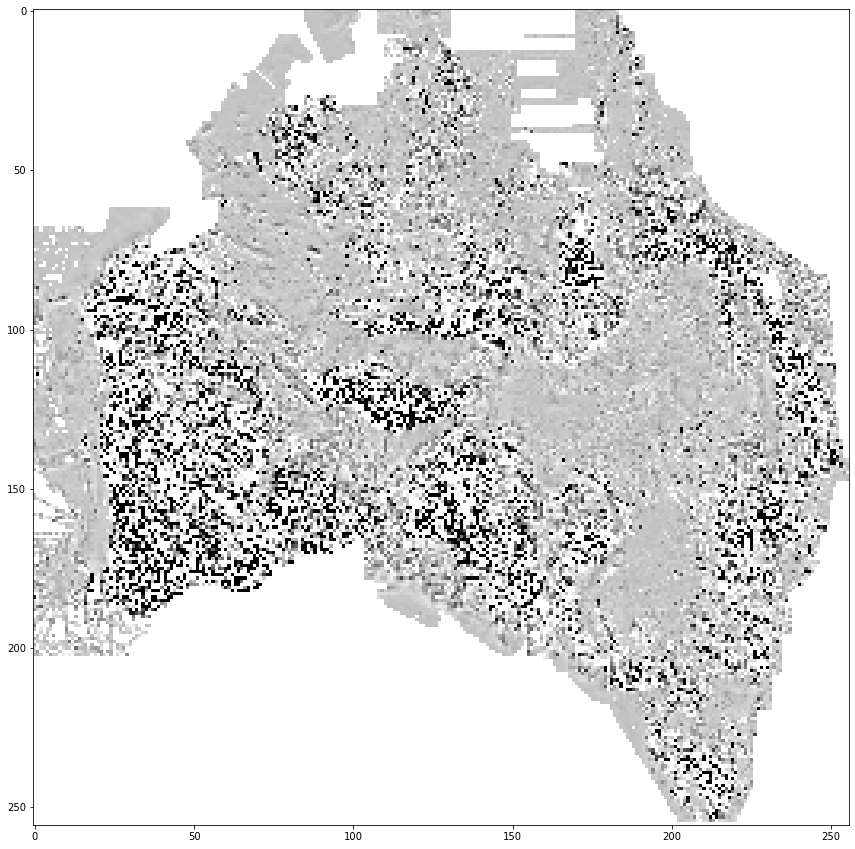

In [13]:
ds = gdal.Open(filename)
band = ds.GetRasterBand(1).ReadAsArray()

fig = plt.figure(figsize=(15,15))
plt.imshow(band, cmap='binary')
plt.clim(-0.03,0.1)

**To request a coverage returned as in the NetCDF format, a similar GetCoverage request is constructed with the format parameter now specifying the NetCDF option.** 

In [14]:
layer = "gravmap2016_grid_grv_ir"

In [15]:
output = wcs.getCoverage(identifier=layer, 
                         time=[wcs[layer].timepositions[0]],
                         bbox=subset_bbox,format='NetCDF',
                         crs='EPSG:4326', width=256, height=256)

In [16]:
print(output.geturl())

https://gsky.nci.org.au/ows/national_geophysical_compilations?version=1.0.0&request=GetCoverage&service=WCS&Coverage=gravmap2016_grid_grv_ir&BBox=112,-44,154,-10&time=2019-08-29T00:00:00.000Z&crs=EPSG:4326&format=NetCDF&width=256&height=256


**Again, write the output to a file to save:**

In [17]:
filename = './gsky_wcs.nc'
with open(filename, 'wb') as f:
    f.write(output.read())

**To confirm or inspect the contents of the NetCDF file, libraries such as NetCDF4 Python or GDAL can be used.** 

In [18]:
from netCDF4 import Dataset

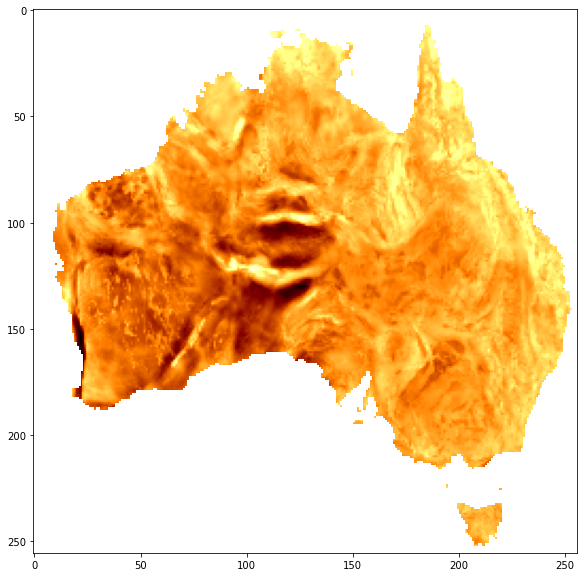

In [19]:
with Dataset(filename) as ds:
    
    band = ds['Band1'][::-1]

    fig = plt.figure(figsize=(10,10))
    plt.imshow(band, cmap='afmhot')

<br>
<br>
<br>


--------
**For more information on the OGC WCS standard specifications and the Python OWSLib package:** <br/>
http://www.opengeospatial.org/standards/wcs <br/>

https://geopython.github.io/OWSLib/#wms <br/>
